# Predicting vibrational thermodynamics

The vibrational entropy, enthalpy, free energy and specific heat will be predicted for a series of 5 semiconductors from the Materials Project with following MP IDs: mp-14363, mp-988, mp-38487, mp-559200, mp-4661.

The predicted results will be compared with DFPT computes values.

In [5]:
import sys
from modnet.models import MODNetModel
from modnet.preprocessing import MODData

## Load the model

In [6]:
model = MODNetModel.load('../pretrained/vib_thermo')

## Create MODData
In order to predict the thermodynamics for the above mentioned compounds, a MODData object should be constructed.
In order to do so, 2 steps are required: (i) creation of a MODData object with structures and optionally MP IDs and (ii) featurization by invoking the featurize() method. The structures were querried from the MP Rester API.

In [7]:
import pandas as pd
df = pd.read_pickle('data/df_thermo_new.pkl')
df['natoms'] = [8,7,14,7,3]
df

,S_5,C_v_5,H_5,U_5,S_10,C_v_10,H_10,U_10,S_15,C_v_15,...,S_795,C_v_795,H_795,U_795,S_800,C_v_800,H_800,U_800,structure,natoms
mpid,,,,,,,,,,,,,,,,,,,,,
mp-14363,0.067759,0.184558,44640.858776,44641.197571,0.510782,1.598688,44639.666826,44644.774648,1.851030,5.816376,...,397.932788,191.287141,-150822.136540,165534.430121,399.132385,191.382787,-152814.802357,166491.105621,"[[2.95548257 3.55797307 6.16204009] Li, [-2.75...",8
mp-988,0.000816,0.002201,76480.626713,76480.630796,0.005959,0.017763,76480.612556,76480.672142,0.020339,0.062582,...,190.422922,155.472010,3818.459910,155204.682561,191.398340,155.685076,2863.904765,155982.576707,[[-3.83015362e-08 4.42268046e+00 2.19381365e...,7
mp-38487,0.010251,0.028806,94613.562074,94613.613327,0.078558,0.243478,94613.378387,94614.163963,0.289885,0.962458,...,533.484081,333.824974,-133920.323566,290199.520483,535.577611,334.008769,-136592.982785,291869.106202,"[[2.71706522 4.78580228 0.14490763] Bi, [4.166...",14
mp-559200,0.043918,0.128862,23112.007674,23112.227262,0.435440,1.571841,23111.082564,23115.436964,1.803626,5.936110,...,397.799147,172.601972,-175838.460038,140411.861918,398.881372,172.626619,-177830.164099,141274.933585,"[[1.12562421 0.79593658 1.94963847] Cd, [ 7.87...",7
mp-4661,0.001324,0.003626,18498.425405,18498.432027,0.009466,0.027762,18498.402684,18498.497344,0.032300,0.101796,...,119.882667,72.061483,-33559.117964,61747.602004,120.334569,72.094710,-34159.662146,62107.992733,"[[ 1.3165874 2.79452082 -0.41493591] O, [3.9...",3


In [8]:
md = MODData(df['structure'],mpids = df.index)

In [9]:
md.featurize(fast=True)

Computing features, this can take time...
Fast featurization on, retrieving from database...
Retrieved features for 5 out of 5 materials
Data has successfully been featurized!


## Predict

In [11]:
df_predictions = model.predict(md)

## Plot of the results, compared with DFPT

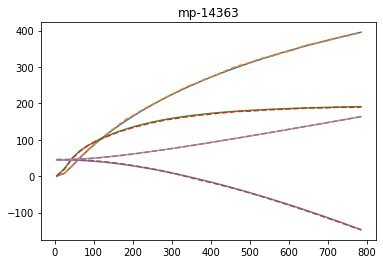

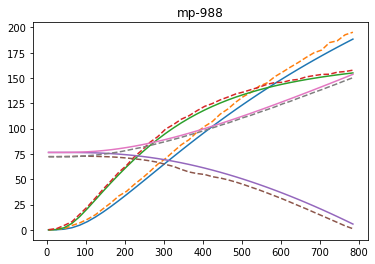

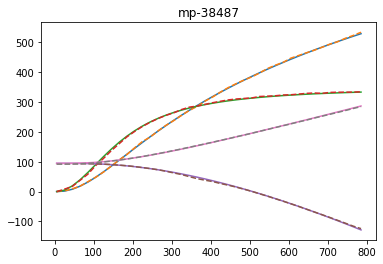

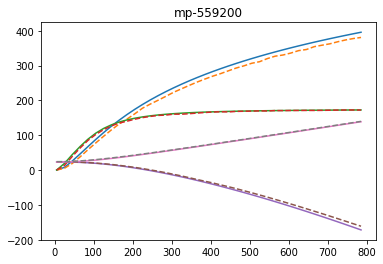

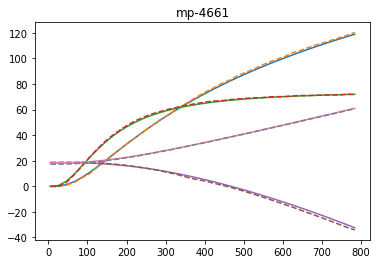

In [12]:
from matplotlib import pyplot as plt

for mpid in df_predictions.index:
    temp = range(5,801,20)
    S_true = df.loc[mpid,['S_{}'.format(T) for T in temp]].values
    S_pred = df_predictions.loc[mpid,['S_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']
    
    C_v_true = df.loc[mpid,['C_v_{}'.format(T) for T in temp]].values
    C_v_pred = df_predictions.loc[mpid,['C_v_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']
    
    H_true = df.loc[mpid,['H_{}'.format(T) for T in temp]].values/1000
    H_pred = df_predictions.loc[mpid,['H_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']/1000
    
    U_true = df.loc[mpid,['U_{}'.format(T) for T in temp]].values/1000
    U_pred = df_predictions.loc[mpid,['U_{}_atom'.format(T) for T in temp]].values*df.loc[mpid,'natoms']/1000
    
    fig,ax = plt.subplots()
    ax.set_title(mpid)
    ax.plot(temp,S_true)
    ax.plot(temp,S_pred,'--')
    
    ax.plot(temp,C_v_true)
    ax.plot(temp,C_v_pred,'--')
    
    ax.plot(temp,H_true)
    ax.plot(temp,H_pred,'--')
    
    ax.plot(temp,U_true)
    ax.plot(temp,U_pred,'--')